In [19]:
from load_data import *
from augumentation import *
from tests import *
import tensorflow as tf

## Data loading

In [20]:
# cinic_directory_train = './data/train/'
# cinic_directory_test = './archive/test/'
# cinic_directory_valid = './archive/valid/'
cinic_directory_train = '../data/train/'
cinic_directory_test = '../data/test/'
cinic_directory_valid = '../data/valid/'

In [21]:
train_ds, valid_ds, test_ds = load_data(
    train_path=cinic_directory_train, 
    valid_path=cinic_directory_valid, 
    test_path=cinic_directory_test,
    label_mode='categorical', 
    batch_size=16,
    image_size=(32, 32)
)

Found 90000 files belonging to 10 classes.
Found 90000 files belonging to 10 classes.
Found 90000 files belonging to 10 classes.


# Models

### Efficient Net V2 B0

In [ ]:
efficientNetV2B0 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(
        input_shape=(224, 224, 3),
        include_top=True,
        weights='imagenet'
    )
efficientNetV2B0.trainable = False

# Training hyperparameters

## Learning rate

In [ ]:
learning_rates = [0.1, 0.01, 0.001]
for learning_rate in learning_rates:
    augumentation = tf.keras.layers.Identity()
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    run_test(
        selected_model=efficientNetV2B0, 
        train_ds=train_ds, 
        valid_ds=valid_ds, 
        test_ds=test_ds, 
        augumentation=augumentation, 
        optimizer=optimizer, 
        batch_size=16, 
        model_name='efficientNet',
        test_name=f'lr_{learning_rate}'
    )

## Batch size

In [ ]:
batch_sizes = [16, 32, 64, 128]
for batch_size in batch_sizes:
    optimizer = tf.keras.optimizers.Adam()
    augumentation = tf.keras.layers.Identity()
    run_test(
        selected_model=efficientNetV2B0, 
        train_ds=train_ds, 
        valid_ds=valid_ds, 
        test_ds=test_ds, 
        augumentation=augumentation, 
        optimizer=optimizer, 
        batch_size=batch_size, 
        model_name='efficientNet',
        test_name=f'batch_size_{batch_size}'
    )

# Augumentation

## Random Rotation

In [ ]:
rotation_values = [0.1, 0.2, 0.3, 0.4]
for rotation_value in rotation_values:
    augumentation = tf.keras.layers.RandomRotation(rotation_value)
    optimizer = tf.keras.optimizers.Adam()
    run_test(
        selected_model=efficientNetV2B0, 
        train_ds=train_ds, 
        valid_ds=valid_ds, 
        test_ds=test_ds, 
        augumentation=augumentation, 
        optimizer=optimizer, 
        batch_size=16, 
        model_name='efficientNet',
        test_name=f'random_rotation_{rotation_value}'
    )

## Gaussian Noise

In [ ]:
noise_values = [0.1, 0.2, 0.3, 0.4]
for noise_value in noise_values:
    augumentation = tf.keras.layers.GaussianNoise(noise_value)
    optimizer = tf.keras.optimizers.Adam()
    run_test(
        selected_model=efficientNetV2B0, 
        train_ds=train_ds, 
        valid_ds=valid_ds, 
        test_ds=test_ds, 
        augumentation=augumentation, 
        optimizer=optimizer, 
        batch_size=16, 
        model_name='efficientNet',
        test_name=f'random_rotation_{noise_value}'
    )

## Random Flip

In [ ]:
flip_modes = ["horizontal", "vertical", "horizontal_and_vertical"]
for mode in flip_modes:
    augumentation = tf.keras.layers.RandomFlip(mode)
    optimizer = tf.keras.optimizers.Adam()
    run_test(
        selected_model=efficientNetV2B0, 
        train_ds=train_ds, 
        valid_ds=valid_ds, 
        test_ds=test_ds, 
        augumentation=augumentation, 
        optimizer=optimizer, 
        batch_size=batch_size, 
        model_name='efficientNet',
        test_name=f'random_flip_{mode}'
    )

## Mix Up

In [22]:
train_zipped = tf.data.Dataset.zip((train_ds, train_ds.shuffle(111)))
train_ds_mu = train_zipped.map(
    lambda ds_one, ds_two: mix_up(ds_one, ds_two, alpha=0.2),
    num_parallel_calls=tf.data.AUTOTUNE,
)

Show mixuped images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[0.         0.         0.         0.         0.         0.00276214
 0.         0.         0.99723786 0.        ], shape=(10,), dtype=float32)
tf.Tensor(
[0.         0.         0.         0.01033813 0.         0.
 0.9896619  0.         0.         0.        ], shape=(10,), dtype=float32)
tf.Tensor([0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], shape=(10,), dtype=float32)


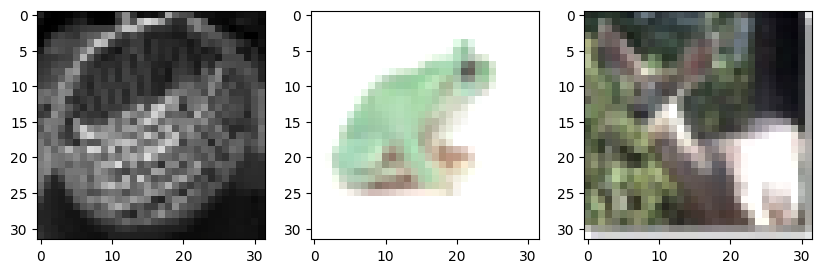

In [23]:
sample_images, sample_labels = next(iter(train_ds_mu))

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(sample_images[:3], sample_labels[:3])):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(sample_images[i].numpy().squeeze()/225.)
    print(sample_labels[i])

In [ ]:
augumentation = tf.keras.layers.Identity()
optimizer = tf.keras.optimizers.Adam()
run_test(
    selected_model=efficientNetV2B0, 
    train_ds=train_ds_mu, 
    valid_ds=valid_ds, 
    test_ds=test_ds, 
    augumentation=augumentation, 
    optimizer=optimizer, 
    batch_size=batch_size, 
    model_name='efficientNet',
    test_name=f'mix_up_0.2'
)